<a href="https://colab.research.google.com/github/gigihsantoso/prediksi-saham/blob/main/Analisis_Saham_TLKM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!wget https://github.com/gigihsantoso/prediksi-saham/blob/main/save_models_saham/model_tlkm.zip?raw=true \
    -O /tmp/model_tlkm.zip

--2022-08-18 10:48:42--  https://github.com/gigihsantoso/prediksi-saham/blob/main/save_models_saham/model_tlkm.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/gigihsantoso/prediksi-saham/raw/main/save_models_saham/model_tlkm.zip [following]
--2022-08-18 10:48:43--  https://github.com/gigihsantoso/prediksi-saham/raw/main/save_models_saham/model_tlkm.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gigihsantoso/prediksi-saham/main/save_models_saham/model_tlkm.zip [following]
--2022-08-18 10:48:43--  https://raw.githubusercontent.com/gigihsantoso/prediksi-saham/main/save_models_saham/model_tlkm.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting 

In [50]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Saham

##Setup

In [51]:
import pathlib
import tensorflow as tf
import zipfile
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive, files, data_table
import tensorflow as tf
import yfinance as yf
from datetime import timedelta, date

## Load Data

In [52]:
data_url = "/tmp/model_tlkm.zip"
data_dir = zipfile.ZipFile(data_url, 'r')
data_dir.extractall("MyFile")
data_dir.close()

In [53]:
data = yf.download('TLKM.JK', period='max').astype(int).sort_index(ascending=True)

[*********************100%***********************]  1 of 1 completed


##Load Model

In [54]:
model = tf.keras.models.load_model('MyFile/content/models/model/1')

##Analisis

In [55]:
data_test = data.copy()
data_test['Scaler'] =  (data_test.loc[:, 'Close']-data_test.loc[:, 'Close'].min())/(data_test.loc[:, 'Close'].max()-data_test.loc[:, 'Close'].min())

In [73]:
data_test.iloc[-30:]

,Open,High,Low,Close,Adj Close,Volume,Scaler
Date,,,,,,,
2022-07-07,4040,4050,4010,4040,4040,42393800,0.808805
2022-07-08,4050,4060,4000,4010,4010,64049000,0.801258
2022-07-11,4100,4100,4000,4040,4040,42258000,0.808805
2022-07-12,4060,4060,4010,4010,4010,43399800,0.801258
2022-07-13,4010,4030,3930,3940,3940,96218200,0.783648
2022-07-14,3940,4020,3900,4020,4020,68708500,0.803774
2022-07-15,4040,4210,4010,4150,4150,146093800,0.836478
2022-07-18,4110,4190,4070,4190,4190,84009400,0.846541
2022-07-19,4190,4190,4130,4160,4160,91367900,0.838994


In [56]:
input_tes =tf.convert_to_tensor([data_test['Scaler'].iloc[-30:].to_numpy()])
predictions_test = model.predict(input_tes)

1/1 [==============================] - 1s 529ms/step


In [57]:
data_predict = pd.DataFrame(pd.bdate_range(start=date.today()+timedelta(days=1), periods=30), columns=['Date']).set_index('Date')
for label, row in data_predict.iterrows():
    data_predict.loc[label, ['Scaler']] = 0
data_predict['Scaler'] = predictions_test.flatten()

In [58]:
data_test = data_test.reset_index()

In [59]:
input_tes =tf.convert_to_tensor([data_test['Scaler'].iloc[-60:-30].to_numpy()])
predictions_test = model.predict(input_tes)

1/1 [==============================] - 0s 21ms/step


In [60]:
data_predict_test = pd.DataFrame(data=data_test['Date'].iloc[-30:], columns=['Date'])
data_predict_test.insert(1, 'Predict', predictions_test.flatten())
data_predict_test.set_index('Date', inplace=True)

In [61]:
input_tes_1 =tf.convert_to_tensor([data_test['Scaler'].iloc[-90:-60].to_numpy()])
predictions_test_1 = model.predict(input_tes_1)

1/1 [==============================] - 0s 23ms/step


In [62]:
data_predict_test_1 = pd.DataFrame(data=data_test['Date'].iloc[-60:-30], columns=['Date'])
data_predict_test_1.insert(1, 'Predict', predictions_test_1.flatten())
data_predict_test_1.set_index('Date', inplace=True)

In [63]:
input_tes_2 =tf.convert_to_tensor([data_test['Scaler'].iloc[-120:-90].to_numpy()])
predictions_test_2 = model.predict(input_tes_1)

1/1 [==============================] - 0s 23ms/step


In [64]:
data_predict_test_2 = pd.DataFrame(data=data_test['Date'].iloc[-90:-60], columns=['Date'])
data_predict_test_2.insert(1, 'Predict', predictions_test_2.flatten())
data_predict_test_2.set_index('Date', inplace=True)

In [65]:
input_tes_3 =tf.convert_to_tensor([data_test['Scaler'].iloc[-150:-120].to_numpy()])
predictions_test_3 = model.predict(input_tes_3)

1/1 [==============================] - 0s 19ms/step


In [66]:
data_predict_test_3 = pd.DataFrame(data=data_test['Date'].iloc[-120:-90], columns=['Date'])
data_predict_test_3.insert(1, 'Predict', predictions_test_3.flatten())
data_predict_test_3.set_index('Date', inplace=True)

In [67]:
input_tes_4 =tf.convert_to_tensor([data_test['Scaler'].iloc[-180:-150].to_numpy()])
predictions_test_4 = model.predict(input_tes_4)

1/1 [==============================] - 0s 23ms/step


In [68]:
data_predict_test_4 = pd.DataFrame(data=data_test['Date'].iloc[-150:-120], columns=['Date'])
data_predict_test_4.insert(1, 'Predict', predictions_test_4.flatten())
data_predict_test_4.set_index('Date', inplace=True)

In [69]:
input_tes_5 =tf.convert_to_tensor([data_test['Scaler'].iloc[-210:-180].to_numpy()])
predictions_test_5 = model.predict(input_tes_5)

1/1 [==============================] - 0s 22ms/step


In [70]:
data_predict_test_5 = pd.DataFrame(data=data_test['Date'].iloc[-180:-150], columns=['Date'])
data_predict_test_5.insert(1, 'Predict', predictions_test_5.flatten())
data_predict_test_5.set_index('Date', inplace=True)

In [71]:
data_test.set_index('Date', inplace=True)

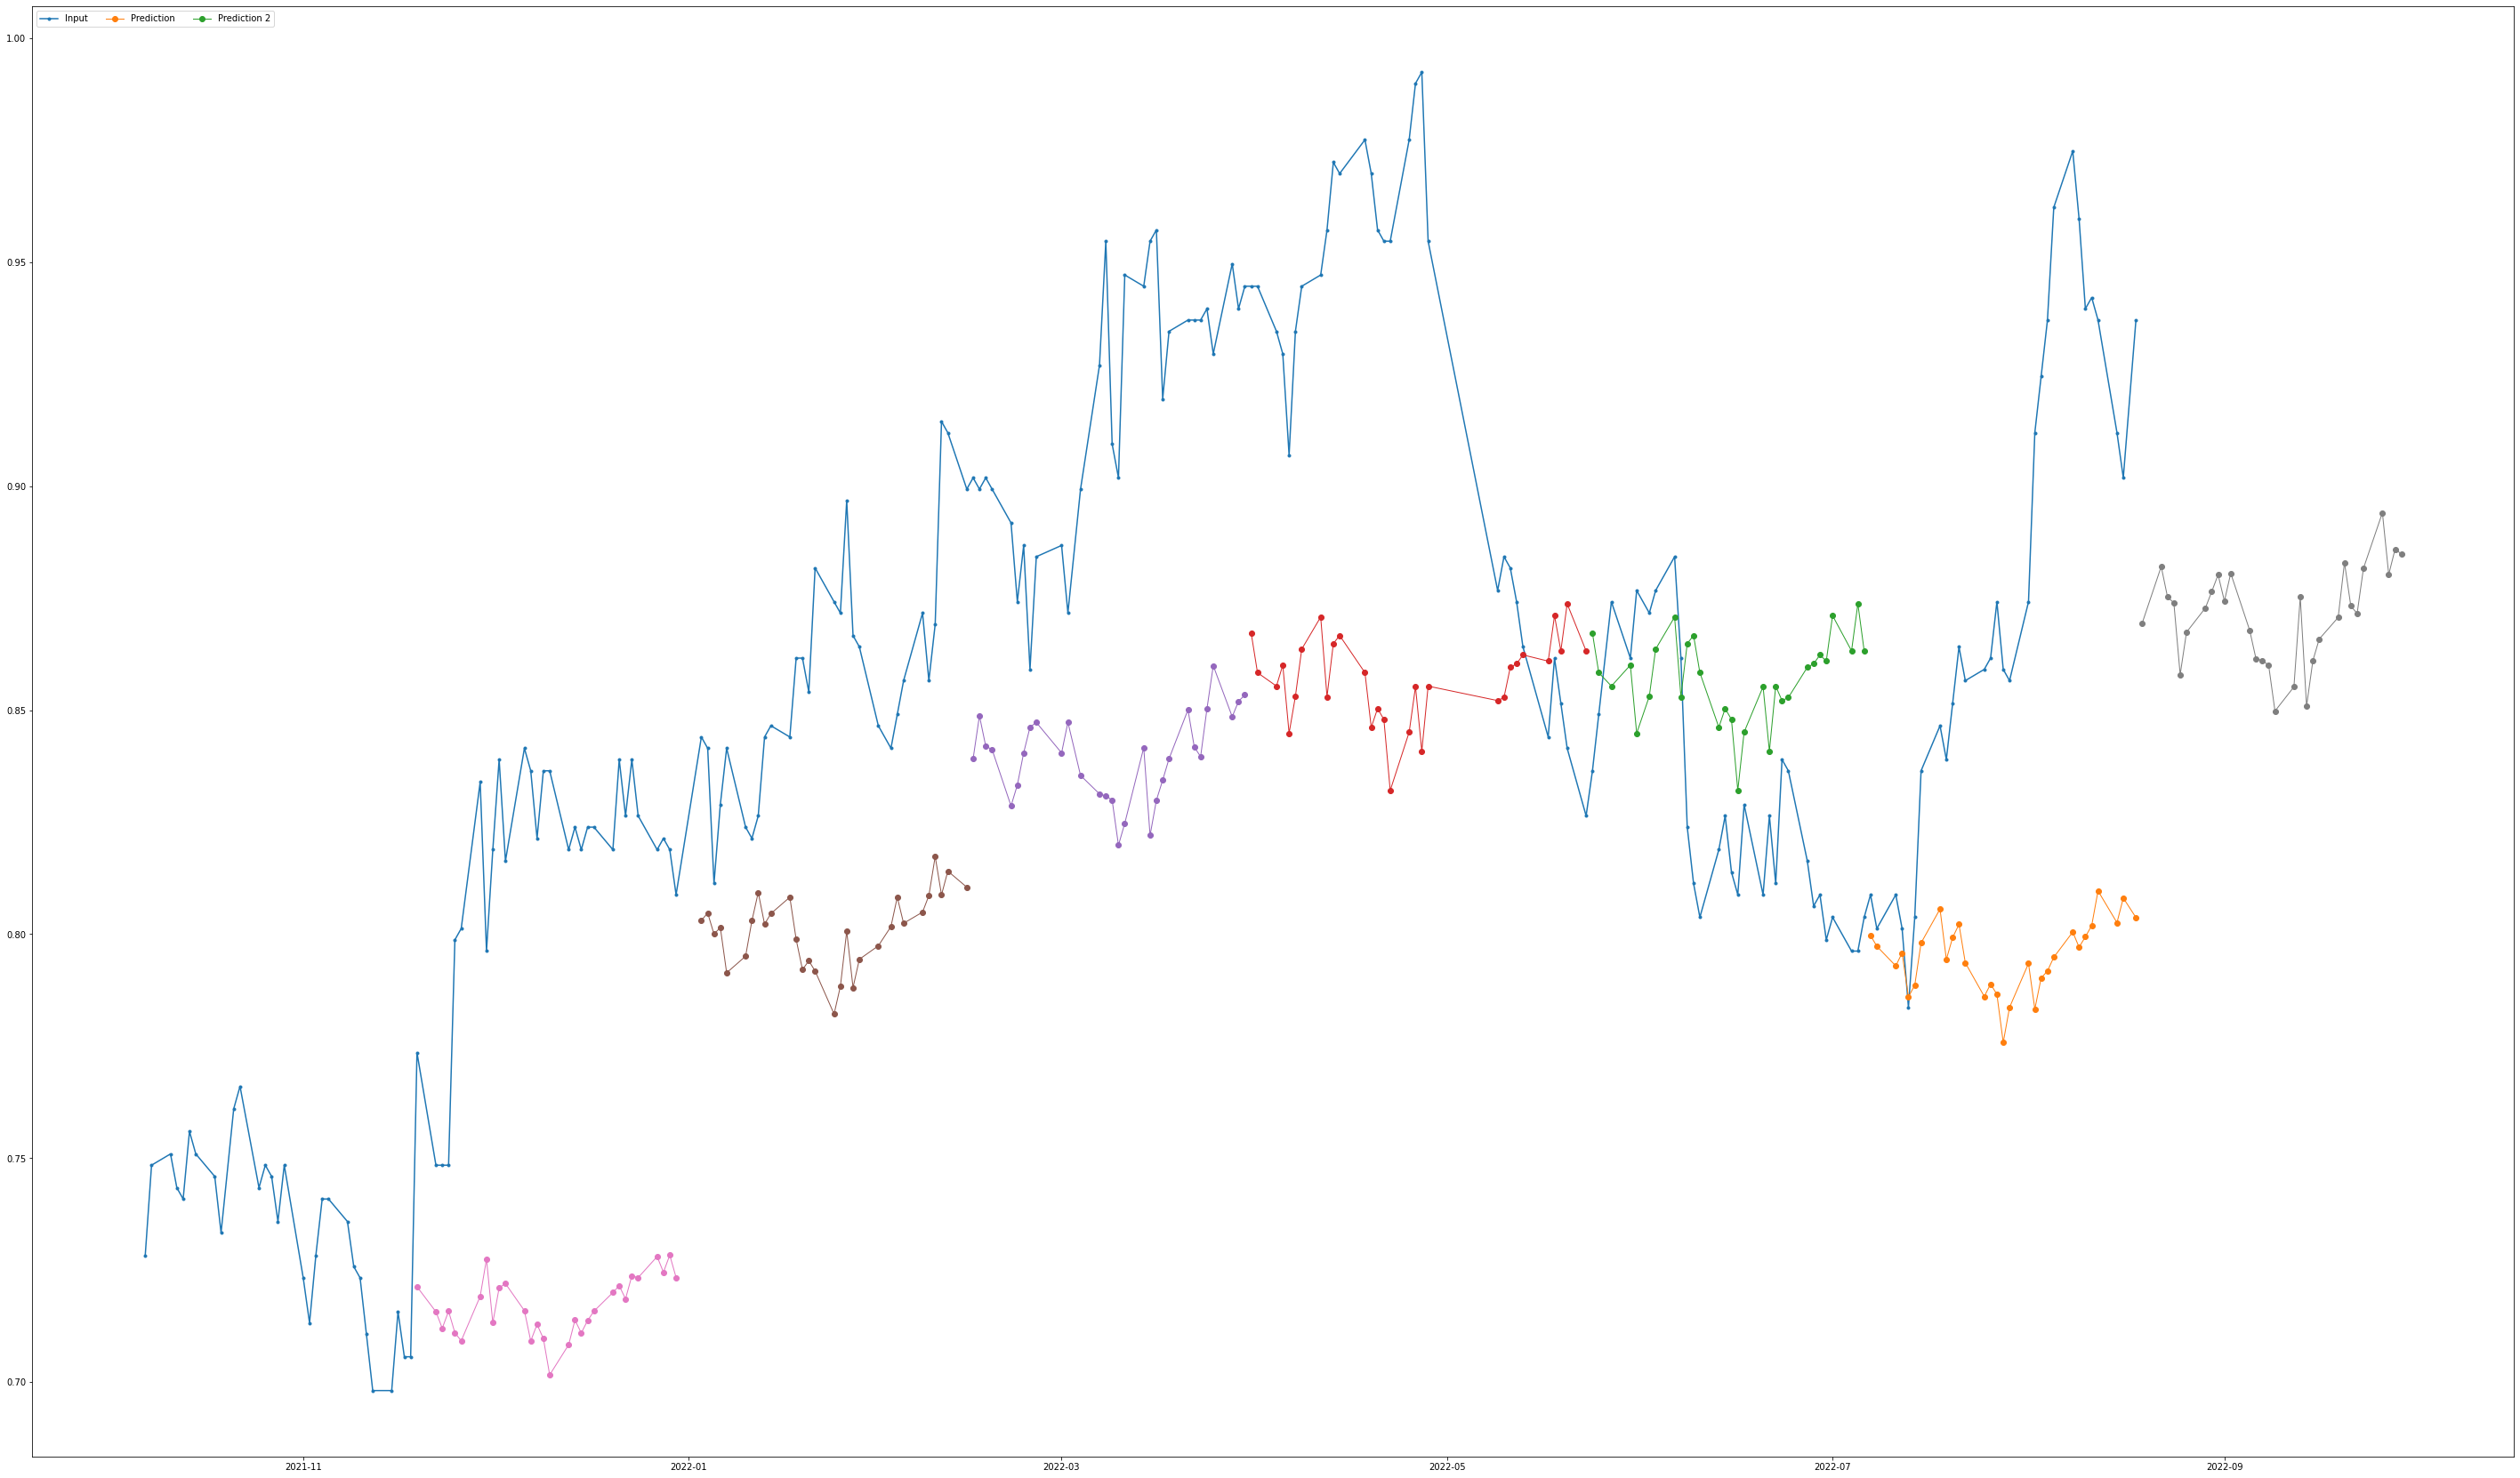

In [72]:
fig, ax = plt.subplots(figsize=(50,30))
ax.plot(data_test['Scaler'].iloc[-210:], marker=".", linewidth=1.5)
ax.plot(data_predict_test, marker="o", linewidth=1)
ax.plot(data_predict_test_1, marker="o", linewidth=1)
ax.plot(data_predict_test_2, marker="o", linewidth=1)
ax.plot(data_predict_test_3, marker="o", linewidth=1)
ax.plot(data_predict_test_4, marker="o", linewidth=1)
ax.plot(data_predict_test_5, marker="o", linewidth=1)
ax.plot(data_predict['Scaler'], marker="o", linewidth=1)
ax.legend(["Input", 'Prediction', 'Prediction 2'], loc='upper left', ncol=3, )
plt.show()